In [29]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter

In [3]:
input_dir = '../01_data/02_satellite_data_processed/'

output_dir = '../03_results/out_sat_data_analysis'

# Adjacent grids cells variability

Check if matrices have the same dimensions

In [4]:
file_pattern = 'matrix_tara_world_adj_grids_*.tsv'
file_paths = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.tsv') and f.startswith('matrix_tara_world_adj_grids_')])

first_shape = pd.read_csv(file_paths[0], sep='\t', index_col=0).shape

all_same_shape = all(pd.read_csv(file_path, sep='\t', index_col=0).shape == first_shape for file_path in file_paths)

if all_same_shape:
    print("All matrices have the same dimensions:", first_shape)
else:
    print("Some matrices have different dimensions.")
    

All matrices have the same dimensions: (83, 17)


Print the standar deviations

In [5]:
# Initialize a list to store the standard deviations
std_devs = []

# Loop from n=05 to n=50
for i in range(4, 50):  # Start at index 4 (which corresponds to n=05)
    matrices = []
    # Load matrices from n=01 to n=current
    for j in range(i + 1):  # Include index i (which corresponds to n=i+1)
        df = pd.read_csv(file_paths[j], sep='\t', index_col=0)
        matrices.append(df.to_numpy())
    
    # Stack matrices along a new dimension and compute the standard deviation
    stacked_matrices = np.stack(matrices, axis=2)
    std_dev = np.std(stacked_matrices, axis=2)
    
    # Convert std_dev to DataFrame for better readability (optional)
    std_dev_df = pd.DataFrame(std_dev, columns=df.columns, index=df.index)
    
    # Store the standard deviation matrix for n=i+1
    std_devs.append((f'n={i+1:02}', std_dev_df))

# Output results
for label, std_dev_df in std_devs:
    print(f"Standard deviation matrix for {label}:")
    print(std_dev_df)
    print()

Standard deviation matrix for n=05:
          CHL.chlor_a  FLH.nflh  KD.Kd_490   PAR.par       PIC.pic    POC.poc  \
TSC_NAME                                                                        
TSC001       0.055737  0.005863   0.004158  0.151211  5.465135e-05   9.203164   
TSC003       0.000732  0.000669   0.000103  0.145253  2.353913e-07   0.124062   
TSC005       0.000313  0.000748   0.000043  0.170808  4.089425e-07   0.058510   
TSC008       0.001201  0.000761   0.000269  0.102182  1.959067e-07   0.272036   
TSC013       0.002730  0.001380   0.000303  0.050712  3.474445e-07   2.784939   
...               ...       ...        ...       ...           ...        ...   
TSC276       0.004862  0.000846   0.000215  0.074014  2.234051e-05   0.670749   
TSC280       0.004607  0.015445   0.001357  0.034043  3.214519e-05   2.832464   
TSC281       0.007831  0.001319   0.000312  0.086273  2.049436e-05   1.713893   
TSC282       0.020079  0.007102   0.000820  0.163129  6.231490e-06   2.68

## Results with POC

In [11]:
# Sort files numerically by the number in the file name
file_paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Initialize a list to store the standard deviations
std_devs = []

# Loop from n=05 to n=50
for i in range(4, 50):  # Start at index 4 (which corresponds to n=05)
    matrices = []
    # Load matrices from n=01 to n=current
    for j in range(i + 1):  # Include index i (which corresponds to n=i+1)
        df = pd.read_csv(file_paths[j], sep='\t', index_col=0)
        matrices.append(df.to_numpy())
    
    # Stack matrices along a new dimension and compute the standard deviation
    stacked_matrices = np.stack(matrices, axis=2)
    std_dev = np.std(stacked_matrices, axis=2)
    
    # Convert std_dev to DataFrame for better readability (optional)
    std_dev_df = pd.DataFrame(std_dev, columns=df.columns, index=df.index)
    
    # Store the standard deviation matrix for n=i+1
    std_devs.append((f'n={i+1:02}', std_dev_df))
    
    # Export the DataFrame to a CSV file
    csv_output_path = os.path.join(output_dir, f'std_dev_matrix_n_{i+1:02}.tsv')
    std_dev_df.to_csv(csv_output_path, sep='\t')
    
    # Plot and save the heatmap with column and index names
    plt.figure(figsize=(12, 10))
    plt.imshow(std_dev_df, cmap='viridis', aspect='auto')
    plt.colorbar(label='Standard Deviation')
    
    # Set the tick positions and labels
    plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
    plt.yticks(ticks=np.arange(len(df.index)), labels=df.index)
    
    plt.title(f'Standard Deviation Heatmap for n={i+1:02}')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    
    # Save the heatmap as an image file
    heatmap_output_path = os.path.join(output_dir, f'std_dev_heatmap_n_{i+1:02}.png')
    plt.savefig(heatmap_output_path)
    plt.close()

# Optional: Output results in the console for verification
for label, std_dev_df in std_devs:
    print(f"Standard deviation matrix for {label}:")
    print(std_dev_df)
    print()

Standard deviation matrix for n=05:
          CHL.chlor_a  FLH.nflh  KD.Kd_490   PAR.par       PIC.pic    POC.poc  \
TSC_NAME                                                                        
TSC001       0.055737  0.005863   0.004158  0.151211  5.465135e-05   9.203164   
TSC003       0.000732  0.000669   0.000103  0.145253  2.353913e-07   0.124062   
TSC005       0.000313  0.000748   0.000043  0.170808  4.089425e-07   0.058510   
TSC008       0.001201  0.000761   0.000269  0.102182  1.959067e-07   0.272036   
TSC013       0.002730  0.001380   0.000303  0.050712  3.474445e-07   2.784939   
...               ...       ...        ...       ...           ...        ...   
TSC276       0.004862  0.000846   0.000215  0.074014  2.234051e-05   0.670749   
TSC280       0.004607  0.015445   0.001357  0.034043  3.214519e-05   2.832464   
TSC281       0.007831  0.001319   0.000312  0.086273  2.049436e-05   1.713893   
TSC282       0.020079  0.007102   0.000820  0.163129  6.231490e-06   2.68

## Results without POC

In [12]:
# Sort files numerically by the number in the file name
file_paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Initialize a list to store the standard deviations
std_devs = []

# Loop from n=05 to n=50
for i in range(4, 50):  # Start at index 4 (which corresponds to n=05)
    matrices = []
    # Load matrices from n=01 to n=current
    for j in range(i + 1):  # Include index i (which corresponds to n=i+1)
        df = pd.read_csv(file_paths[j], sep='\t', index_col=0)
        df = df.drop(columns=['POC.poc'])  # Drop the 'POC.poc' column
        matrices.append(df.to_numpy())
    
    # Stack matrices along a new dimension and compute the standard deviation
    stacked_matrices = np.stack(matrices, axis=2)
    std_dev = np.std(stacked_matrices, axis=2)
    
    # Convert std_dev to DataFrame with updated columns and index
    std_dev_df = pd.DataFrame(std_dev, columns=df.columns, index=df.index)
    
    # Store the standard deviation matrix for n=i+1
    std_devs.append((f'n={i+1:02}', std_dev_df))
    
    # Export the DataFrame to a CSV file
    csv_output_path_wp_poc = os.path.join(output_dir, f'std_dev_matrix_wo_poc_n_{i+1:02}.tsv')
    std_dev_df.to_csv(csv_output_path_wp_poc, sep='\t')
    
    # Plot and save the heatmap with column and index names
    plt.figure(figsize=(12, 10))
    plt.imshow(std_dev_df, cmap='viridis', aspect='auto')
    plt.colorbar(label='Standard Deviation')
    
    # Set the tick positions and labels
    plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
    plt.yticks(ticks=np.arange(len(df.index)), labels=df.index)
    
    plt.title(f'Standard Deviation Heatmap for n={i+1:02}')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    
    # Save the heatmap as an image file
    heatmap_output_path_wo_poc = os.path.join(output_dir, f'std_dev_heatmap_wo_poc_n_{i+1:02}.png')
    plt.savefig(heatmap_output_path_wo_poc)
    plt.close()

# Optional: Output results in the console for verification
for label, std_dev_df in std_devs:
    print(f"Standard deviation matrix for {label}:")
    print(std_dev_df)
    print()

Standard deviation matrix for n=05:
          CHL.chlor_a  FLH.nflh  KD.Kd_490   PAR.par       PIC.pic  \
TSC_NAME                                                             
TSC001       0.055737  0.005863   0.004158  0.151211  5.465135e-05   
TSC003       0.000732  0.000669   0.000103  0.145253  2.353913e-07   
TSC005       0.000313  0.000748   0.000043  0.170808  4.089425e-07   
TSC008       0.001201  0.000761   0.000269  0.102182  1.959067e-07   
TSC013       0.002730  0.001380   0.000303  0.050712  3.474445e-07   
...               ...       ...        ...       ...           ...   
TSC276       0.004862  0.000846   0.000215  0.074014  2.234051e-05   
TSC280       0.004607  0.015445   0.001357  0.034043  3.214519e-05   
TSC281       0.007831  0.001319   0.000312  0.086273  2.049436e-05   
TSC282       0.020079  0.007102   0.000820  0.163129  6.231490e-06   
TSC285       0.087847  0.016590   0.024855  0.045451  7.096238e-05   

          RRS.Rrs_412  RRS.Rrs_443  RRS.Rrs_469  RRS.

## Results with features standarize

In [13]:
# Sort files numerically by the number in the file name
file_paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Initialize a list to store the standard deviations
std_devs = []

# Loop from n=05 to n=50
for i in range(4, 50):  # Start at index 4 (which corresponds to n=05)
    matrices = []
    
    # Load and standardize matrices from n=01 to n=current
    for j in range(i + 1):  # Include index i (which corresponds to n=i+1)
        df = pd.read_csv(file_paths[j], sep='\t', index_col=0)
        
        # Standardize each column of the matrix
        standardized_df = (df - df.mean()) / df.std()
        
        # Append the standardized matrix to the list
        matrices.append(standardized_df.to_numpy())
    
    # Stack matrices along a new dimension and compute the standard deviation
    stacked_matrices = np.stack(matrices, axis=2)
    std_dev = np.std(stacked_matrices, axis=2)
    
    # Convert std_dev to DataFrame for better readability
    std_dev_df = pd.DataFrame(std_dev, columns=df.columns, index=df.index)
    
    # Store the standard deviation matrix for n=i+1
    std_devs.append((f'n={i+1:02}', std_dev_df))
    
    # Export the DataFrame to a CSV file
    csv_output_path_standarized = os.path.join(output_dir, f'std_dev_matrix_standarized_n_{i+1:02}.tsv')
    std_dev_df.to_csv(csv_output_path_standarized, sep='\t')
    
    # Plot and save the heatmap with column and index names
    plt.figure(figsize=(12, 10))
    plt.imshow(std_dev_df, cmap='viridis', aspect='auto')
    plt.colorbar(label='Standard Deviation')
    
    # Set the tick positions and labels
    plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
    plt.yticks(ticks=np.arange(len(df.index)), labels=df.index)
    
    plt.title(f'Standard Deviation Heatmap for n={i+1:02}')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    
    # Save the heatmap as an image file
    heatmap_output_path_standarized = os.path.join(output_dir, f'std_dev_heatmap_standarized_n_{i+1:02}.png')
    plt.savefig(heatmap_output_path_standarized)
    plt.close()

# Optional: Output results in the console for verification
for label, std_dev_df in std_devs:
    print(f"Standard deviation matrix for {label}:")
    print(std_dev_df)
    print()

Standard deviation matrix for n=05:
          CHL.chlor_a  FLH.nflh  KD.Kd_490   PAR.par   PIC.pic   POC.poc  \
TSC_NAME                                                                   
TSC001       0.038188  0.041440   0.027497  0.012136  0.076440  0.053999   
TSC003       0.012598  0.004634   0.007971  0.011178  0.085116  0.020534   
TSC005       0.015895  0.005549   0.009683  0.011431  0.080587  0.024028   
TSC008       0.011542  0.005799   0.008398  0.006724  0.084997  0.020162   
TSC013       0.004342  0.011006   0.004357  0.005126  0.085848  0.016313   
...               ...       ...        ...       ...       ...       ...   
TSC276       0.004978  0.005475   0.006791  0.007338  0.167837  0.012511   
TSC280       0.014231  0.110911   0.007092  0.001798  0.311533  0.027721   
TSC281       0.006677  0.007682   0.009068  0.004617  0.061261  0.010031   
TSC282       0.009797  0.063555   0.012945  0.011124  0.005677  0.011108   
TSC285       0.389064  0.107909   0.439189  0.004599

# Correlation between metadata and sat data

In [25]:
sat_data_p09 = pd.read_csv(file_paths[8], sep='\t', index_col=0)

md = pd.read_csv('../01_data/01_biological_data/metadata.tsv', sep='\t', index_col=0)
vars_to_consider = ['NPP 8d VGPM (mgC/m2/day)', 'Mean Flux at 150m']
md_npp_cflux = md[vars_to_consider]

md_npp_cflux_aligned = md_npp_cflux.loc[sat_data_p09.index]


md_npp_cflux_aligned

,NPP 8d VGPM (mgC/m2/day),Mean Flux at 150m
TSC_NAME,,
TSC001,686.0860,NaN
TSC003,354.2245,NaN
TSC005,205.1220,NaN
TSC008,331.7890,NaN
TSC013,478.1350,2.376476
...,...,...
TSC276,NaN,NaN
TSC280,NaN,NaN
TSC281,NaN,NaN


In [39]:
md_npp_cflux_aligned['Mean Flux at 150m'].isna().sum()

32

In [40]:
83-32

51

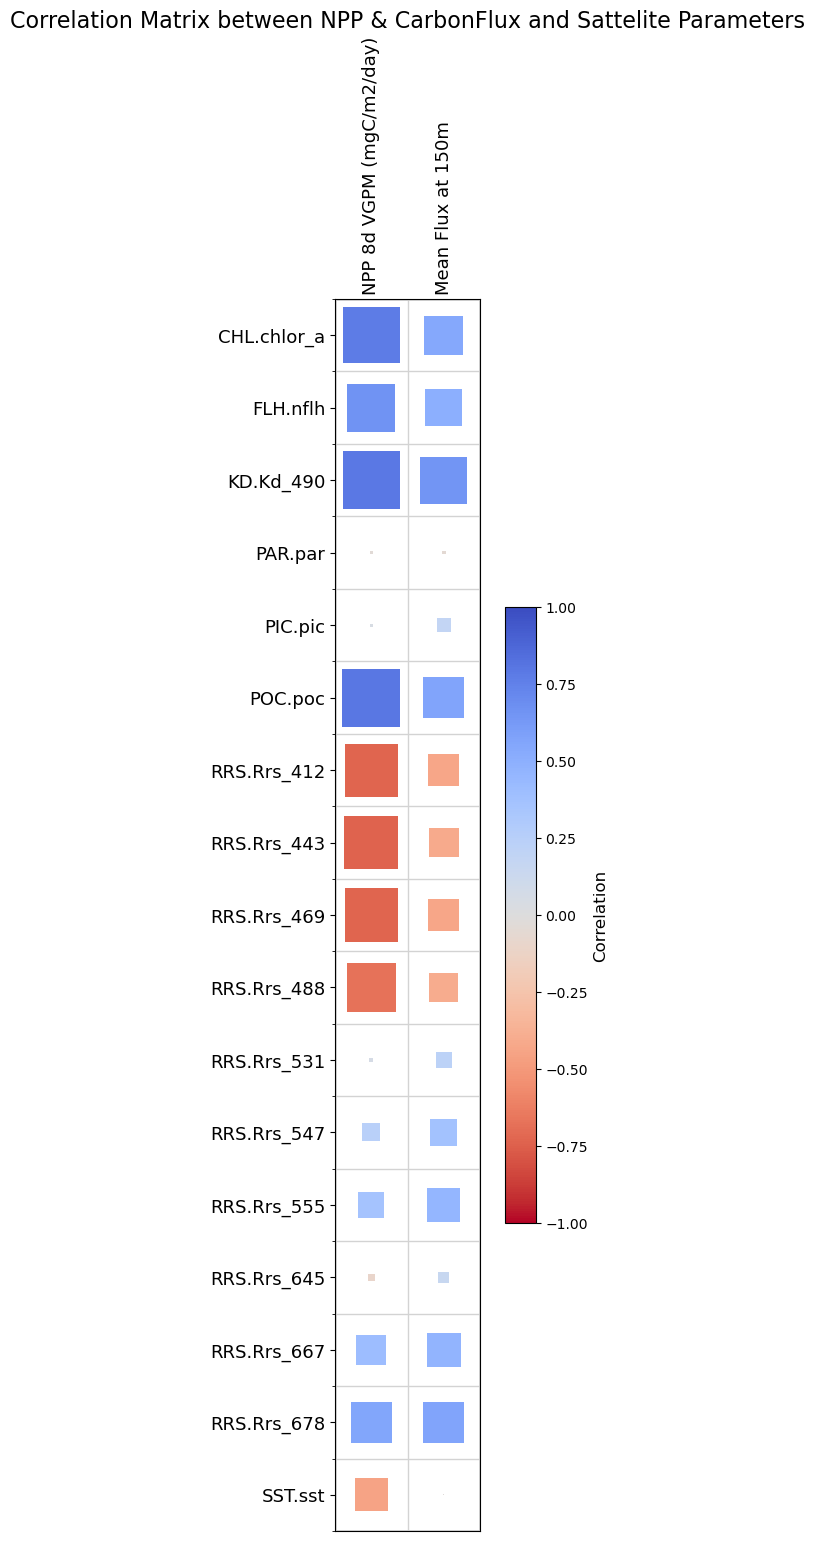

In [37]:
# Concatenate the aligned metadata and satellite data along the columns
combined_data = pd.concat([md_npp_cflux_aligned, sat_data_p09], axis=1)

# Compute the full correlation matrix
corr_df = combined_data.corr(method='spearman')

corr_selected = corr_df.loc[md_npp_cflux_aligned.columns, sat_data_p09.columns].T

# Create the figure
fig, ax = plt.subplots(figsize=(8, 16))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_selected), cmap='gray_r', interpolation='nearest')

# Set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_selected.columns)))
ax.set_yticks(np.arange(len(corr_selected.index)))
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)
ax.set_yticklabels(corr_selected.index, fontsize=13, color="black")
ax.set_xticklabels(corr_selected.columns, fontsize=13, color="black", rotation=90)

# Create grid lines between the tick labels
ax.set_xticks(np.arange(len(corr_selected.columns) + 1) - .5, minor=True)
ax.set_yticks(np.arange(len(corr_selected.index) + 1) - .5, minor=True)
ax.grid(which="minor", color="lightgray", linestyle="-", linewidth=1)

# Add rectangle around the grid
rect = plt.Rectangle((-.5, -.5), len(corr_selected.columns), len(corr_selected.index), linewidth=2, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# Create squares with size proportional to the absolute value of correlation
norm = plt.Normalize(-1, 1)
sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
for i in range(len(corr_selected.columns)):
    for j in range(len(corr_selected.index)):
        correlation = corr_selected.iat[j, i]
        color = sm.to_rgba(correlation)
        size = abs(correlation) * 1  # Adjust size factor as needed
        square = Rectangle(xy=(i - size / 2, j - size / 2), width=size, height=size, facecolor=color)
        ax.add_patch(square)

# Add color bar
cbar = plt.colorbar(sm, ax=ax, shrink=0.5, aspect=20, pad=0.04)
cbar.set_label('Correlation', fontsize=12)
plt.title('Correlation Matrix between NPP & CarbonFlux and Sattelite Parameters', fontsize=16)

plt.show()